In [89]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [90]:
#Extracting the data from database table
conn=sqlite3.connect('database.sqlite')
filtered_data=pd.read_sql_query('select * from Reviews where Score!=3',conn)
print(filtered_data.head())
print(filtered_data.shape)

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [91]:
#Changing the Score column with Positive(Rating 4 and 5) and negative(rating 1 and 2)
def partition(x):
    if x<3:
        return 'negative'
    else:
        
        return 'positive'
dub_score=filtered_data['Score']
positivenegative=dub_score.map(partition)
filtered_data['Score']=positivenegative

In [92]:
#first 5 rows of data after changing the score column
print(filtered_data.shape)
filtered_data.head()

(525814, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [93]:
#Printing the Duplicate data just a verification
display=pd.read_sql_query('SELECT * FROM Reviews WHERE Score != 3 AND UserId="AR5J8UI46CURR" ORDER BY ProductID',conn)
print(display.shape)
display.head()

(5, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [94]:
#sorting the data before removing duplicates
sorted_data=filtered_data.sort_values('ProductId',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')
sorted_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...


In [95]:
#drop_duplicates
final=sorted_data.drop_duplicates(subset={'ProfileName','UserId','Time','Text'},keep='first',inplace=False)
print(final.shape)
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
final.shape

(364173, 10)


(364171, 10)

In [96]:
#percentage of data remaining after removing duplicates to the data we initially took.
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

69.25852107399194

In [97]:
#count of positive and negative reviews
final['Score'].value_counts()

positive    307061
negative     57110
Name: Score, dtype: int64

In [98]:
#data-preprocessing
#printing all the html tags in our review text
import re
i=0
for sent in final['Text'].values:
    if(len(re.findall('<.*?>',sent))):
        print(sent)
        break
    i+=1
print(i)  

I set aside at least an hour each day to read to my son (3 y/o). At this point, I consider myself a connoisseur of children's books and this is one of the best. Santa Clause put this under the tree. Since then, we've read it perpetually and he loves it.<br /><br />First, this book taught him the months of the year.<br /><br />Second, it's a pleasure to read. Well suited to 1.5 y/o old to 4+.<br /><br />Very few children's books are worth owning. Most should be borrowed from the library. This book, however, deserves a permanent spot on your shelf. Sendak's best.
6


In [99]:
#defining functions for removing html tags and punctuations
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{"won't", 'such', 'not', 'on', 'him', 'has', 'after', 'more', 'while', 'during', 'through', "mightn't", 'them', 'there', 're', 'but', "should've", "shan't", 'most', 'my', 'how', 'y', 'again', 'which', 'a', 'will', 'm', 'me', 'o', "isn't", 'ma', 'mightn', 'in', 'then', "weren't", 'because', 'haven', 'were', "hadn't", 'won', 'only', "wasn't", 'if', 'now', "haven't", 'are', 'some', "you'll", 'for', 'you', 'to', 'all', 'wasn', 'this', 'as', 'any', 'off', 'aren', 'between', 'own', 'himself', 'its', 'hasn', "shouldn't", 'few', 'their', 'that', 'from', 'doesn', 'does', 'into', 'both', 'once', 'needn', 'who', 'very', 'where', 'myself', 'nor', "couldn't", 't', 'under', 'until', 'i', 'she', 'by', 'themselves', 'no', 'her', "mustn't", 'hers', 'am', 'with', 'what', 'can', "it's", "you're", 'than', 'should', 'doing', 'an', 'of', "aren't", 'against', 'too', 'isn', 'other', 'it', 'at', 'same', 'been', "didn't", 'so', 'wouldn', 'his', 'further', 'yourselves', 'ours', 'he', 'above', 'they', "you've", '

In [100]:
i=0
str1=' '
final_string=[]
all_positive_words=[]
all_negative_words=[] 
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split(): #remove puncuations
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) 
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) 
                else:
                    continue
            else:
                continue 
    str1 = b" ".join(filtered_sentence) 
    
    final_string.append(str1)
    i+=1

In [101]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final.head()
print(final.shape)

(364171, 11)


In [102]:
final.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
178145,193174,B009RSR8HO,A4P6AN2L435PV,romarc,0,0,positive,1350432000,LOVE!! LOVE!!,"LOVE, LOVE this sweetener!! I use it in all m...",love love sweeten use bake unsweeten flavor co...
173675,188389,B009SF0TN6,A1L0GWGRK4BYPT,Bety Robinson,0,0,positive,1350518400,Amazing!! Great sauce for everything!,You have to try this sauce to believe it! It s...,tri sauc believ start littl sweet honey tast b...
204727,221795,B009SR4OQ2,A32A6X5KCP7ARG,sicamar,1,1,positive,1350604800,Awesome Taste,I bought this Hazelnut Paste (Nocciola Spread)...,bought hazelnut past nocciola spread local sho...
5259,5703,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,positive,1351209600,DELICIOUS,Purchased this product at a local store in NY ...,purchas product local store kid love quick eas...
302474,327601,B009WVB40S,A3ME78KVX31T21,K'la,0,0,positive,1351123200,Tasty!,I purchased this to send to my son who's away ...,purchas send son whos away colleg deliv right ...


In [103]:
#storing the cleaned data in the form of sql table for furthur use
conn = sqlite3.connect('finalss.sqlite')
c=conn.cursor()
conn.text_factory = str
final.to_sql('Reviewwss',conn,schema=None,if_exists='replace',index=True,index_label=None,chunksize=None,dtype=None)

In [104]:
#reading or extracting the newly stored sql table and we will be using same throughtout our analysis
con=sqlite3.connect('finalss.sqlite')
cleaned_data=pd.read_sql_query('select * from Reviewwss',con)
cleaned_data.shape

(364171, 12)

In [105]:
#randomly sampling set of positive and neagative reviews from our dataset and concatinate them
positive_sample=cleaned_data[cleaned_data['Score'].values=='positive'].sample(n=10000)
negative_sample=cleaned_data[cleaned_data['Score']=='negative'].sample(n=10000)
final_data=pd.concat([positive_sample,negative_sample])
final_data.shape

(20000, 12)

In [106]:
#sorting the data with time
final_data['Time']=pd.to_datetime(final_data['Time'],unit='s')
final_data=final_data.sort_values(by='Time')

In [107]:
#Bag of words 
#function for best-k value
def k_classifier(X_train,y_train):
    mylist=list(range(0,50))
    neighbors=list(filter(lambda x: x % 2 != 0,mylist))
    cv_scores=[]
    
    for k in neighbors:
        knn=KNeighborsClassifier(n_neighbors=k,algorithm='brute')
        scores=cross_val_score(knn,X_train,y_train,cv=10,scoring='accuracy')
        cv_scores.append(scores.mean())
    MSE=[1-x for x in cv_scores]
    best_k=neighbors[MSE.index(min(MSE))]
    print('best_k is',best_k)
    #ploting k VS MSE
    plt.plot(neighbors,MSE)
    for xy in zip(neighbors,np.round(MSE,3)):
        plt.annotate('(%s,%s)'% xy,xy=xy,textcoords='data')
    plt.title('MSE vs k')
    plt.xlabel('K-values')
    plt.ylabel('MSE')
    plt.show()
    print("mis-classification error is",np.round(MSE,3))
    return best_k

In [108]:
X=final_data['CleanedText']
X.shape

(20000,)

In [109]:
Y=final_data['Score']
Y.shape

(20000,)

In [110]:
#splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print(X_train.shape,y_train.shape,y_test.shape,X_test.shape)

(14000,) (14000,) (6000,) (6000,)


In [111]:
# training our data with bag of words
bow=CountVectorizer()
X_train=bow.fit_transform(X_train)
X_train

<14000x15523 sparse matrix of type '<class 'numpy.int64'>'
	with 450527 stored elements in Compressed Sparse Row format>

In [112]:
#applying out fit model to test data 
X_test=bow.transform(X_test)
X_test.shape

(6000, 15523)

best_k is 27


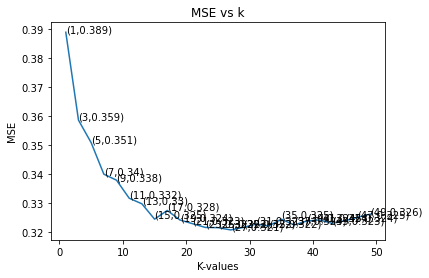

mis-classification error is [0.389 0.359 0.351 0.34  0.338 0.332 0.33  0.325 0.328 0.324 0.323 0.322
 0.322 0.321 0.322 0.323 0.322 0.325 0.323 0.324 0.324 0.323 0.324 0.325
 0.326]


27

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#finding the best k
best_k=k_classifier(X_train,y_train)
best_k

In [114]:
#training our data with KNN
bow_data=KNeighborsClassifier(best_k)
bow_data.fit(X_train,y_train)
pred=bow_data.predict(X_test)

In [115]:
Score=bow_data.score(X_train,y_train)
print('train accuracy is',Score)
train_error=1-Score
print('train error is',train_error)

train accuracy is 0.7161428571428572
train error is 0.2838571428571428


In [116]:
#predicting the acuracy on unseen test data
bow_accuracy=accuracy_score(pred,y_test)*100
print("bow accuracy for k=%d is %f%%" %(best_k,bow_accuracy))

bow accuracy for k=27 is 67.200000%


In [117]:
#Tf-idf
X=final_data['CleanedText']
Y=final_data['Score']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(14000,) (6000,) (14000,) (6000,)


In [118]:
tf_idf_vect=TfidfVectorizer()
X_train_tfidf=tf_idf_vect.fit_transform(X_train)
X_train_tfidf

<14000x15523 sparse matrix of type '<class 'numpy.float64'>'
	with 450527 stored elements in Compressed Sparse Row format>

In [119]:
X_test_tfidf=tf_idf_vect.transform(X_test)
X_test_tfidf

<6000x15523 sparse matrix of type '<class 'numpy.float64'>'
	with 193514 stored elements in Compressed Sparse Row format>

best_k is 47


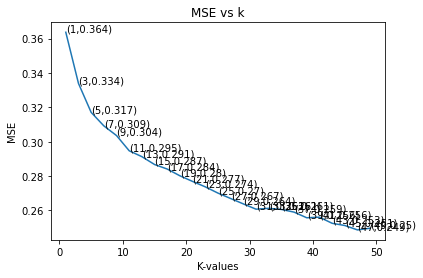

mis-classification error is [0.364 0.334 0.317 0.309 0.304 0.295 0.291 0.287 0.284 0.28  0.277 0.274
 0.27  0.267 0.264 0.261 0.261 0.261 0.259 0.256 0.256 0.253 0.251 0.249
 0.25 ]


47

In [120]:
optimal_k=k_classifier(X_train_tfidf,y_train)
optimal_k

In [121]:
optimal_k=KNeighborsClassifier(best_k)
optimal_k.fit(X_train_tfidf,y_train)
pred=optimal_k.predict(X_test_tfidf)

In [122]:
train_accuracy=optimal_k.score(X_train_tfidf,y_train)
print('train_accuracy is',train_accuracy)
trainerror=1-train_accuracy
print('train_error is',trainerror)

train_accuracy is 0.7670714285714286
train_error is 0.23292857142857137


In [123]:
test_accuracy=accuracy_score(pred,y_test)
print('test_accuracy is',test_accuracy)
test_error=1-test_accuracy
print('test_error is',test_error)

test_accuracy is 0.7271666666666666
test_error is 0.27283333333333337


In [124]:
#word2vec
X=final_data['Text'].values
X.shape

(20000,)

In [125]:
Y=final_data['Score'].values
Y.shape

(20000,)

In [126]:
cleaned_final=[]
for sent in X:
    cleaned_str=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for w in cleanpunc(w).split():
            if((w.isalpha())&(len(w)>2)):
                cleaned_str.append(w.lower())
            else:
                continue
    cleaned_final.append(cleaned_str)
final_data['cleanedText1']=cleaned_final
X1=final_data['cleanedText1']

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X1,Y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(14000,) (6000,) (14000,) (6000,)


In [128]:
w2v_model=Word2Vec(X_train,size=50,workers=4,min_count=5)

In [129]:
w2v_model.wv.most_similar('like')

[('nasty', 0.6874471306800842),
 ('awful', 0.6695495247840881),
 ('repulsive', 0.6694379448890686),
 ('weird', 0.6600860953330994),
 ('gross', 0.6444658637046814),
 ('disgusting', 0.6269435882568359),
 ('overpower', 0.6237735748291016),
 ('burnt', 0.6195701956748962),
 ('terrible', 0.6141651272773743),
 ('think', 0.6083993911743164)]

In [130]:
w2v_words = list(w2v_model.wv.vocab)
len(w2v_words)

7615

In [131]:
#Avg-w2v for train data
sent_vectors=[]
for sent in X_train:
    sent_vec=np.zeros(50)
    cnt_words=0
    for word in sent:
        if word in w2v_words:
            vec=w2v_model.wv[word]
            sent_vec+=vec
            cnt_words+=1
    if cnt_words!=0:
        sent_vec/=cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

14000
50


In [132]:
#Avg-w2v for test data
sent_vectors_test=[]
for sent in X_test:
    sent_vec=np.zeros(50)
    cnt_words=0
    for word in sent:
        if word in w2v_words:
            vec=w2v_model.wv[word]
            sent_vec+=vec
            cnt_words+=1
    if cnt_words!=0:
        sent_vec/=cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

6000
50


In [133]:
X_train=sent_vectors
len(X_train)

14000

In [134]:
X_test=sent_vectors_test
len(X_test)

6000

best_k is 47


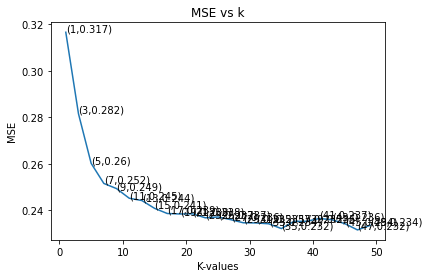

mis-classification error is [0.317 0.282 0.26  0.252 0.249 0.245 0.244 0.241 0.239 0.238 0.238 0.237
 0.237 0.236 0.235 0.235 0.234 0.232 0.235 0.235 0.237 0.236 0.234 0.232
 0.234]


In [135]:
optimalk=k_classifier(X_train,y_train)

In [136]:
optimalk_r=KNeighborsClassifier(optimalk)
optimalk_r.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=47)

In [137]:
pred=optimalk_r.predict(X_test)

In [138]:
train_accuracy=optimalk_r.score(X_train,y_train)
print('avg Word2vec train accuracy is',train_accuracy)

avg Word2vec train accuracy is 0.7774285714285715


In [139]:
test_accuracy=accuracy_score(pred,y_test)
print('test_accuracy of Avgw2v is',test_accuracy)

test_accuracy of Avgw2v is 0.7615


In [ ]:
#tf-idf-weightedw2v
tf_idf_feat=tf_idf_vect.get_feature_names()
tf_idf_sent_vec=[]
row=0
for sent in X_train:
    sent_vec=np.zeros(50)
    weight_sum=0
    for word in sent:
        if word in w2v_words:
            vec=w2v_model.wv[word]
            tf_idf=X_train_tfidf[row,tf_idf_feat.index(word)]
            sent_vec+=(vec*tf_idf)
            weight_sum+=tf_idf
    sent_vec/=weight_sum
    tf_idf_sent_vec.append(sent_vec)
    row+=1
len(tf_idf_sent_vec)

In [ ]:
X_train_weightedtrain=tf_idf_sent_vec
len(X_train_weightedtrain)

In [ ]:
X_train_w=np.nan_to_num(X_train_weightedtrain)


In [ ]:
optimal_k_weighted=k_classifier(X_train_w,y_train)

In [ ]:
optimal_k_w=KNeighborsClassifier(optimal_k_weighted)
optimal_k_w.fit(X_train_w,y_train)

In [ ]:
train_accuracy1=optimal_k_w.score(X_train_w,y_train)
print('tf-idf-weighted Word2vec train accuracy is',train_accuracy1)

In [ ]:
tf_idf_feat=tf_idf_vect.get_feature_names()
tf_idf_sent_vec=[]
row=0
for sent in X_test:
    sent_vec=np.zeros(50)
    weight_sum=0
    for word in sent:
        if word in w2v_words:
            vec=w2v_model.wv[word]
            tf_idf=X_test_tfidf[row,tf_idf_feat.index(word)]
            sent_vec+=(vec*tf_idf)
            weight_sum+=tf_idf
    sent_vec/=weight_sum
    tf_idf_sent_vec.append(sent_vec)
    row+=1

In [ ]:
X_test_w=tf_idf_sent_vec
len(X_test_w)

In [ ]:
X_test_f=np.nan_to_num(X_test_w)
len(X_test_f)

In [ ]:
pred=optimal_k_w.predict(X_test_f)

In [ ]:
test_accuracy_weightedtfidf=accuracy_score(pred,y_test)
print("test accuracy of tf-idf weighted w2v is",test_accuracy_weightedtfidf)

# conclusion:

Test accuracy(unseen data) using KNN brute force:
<n>Test Accuracy on BOW=70%
<n>Test Accuracy on Tf-idf=77%
<n>Test Accuracy on AverageWord2vec=76%
<n>Test Accuracy on TF-IDF weighted Word2Vec=49%


1)Tf-idf has predicted 77% accurate and Avg-word2vec has predicted 76% accurate on test data using Brute force.
<n>2)Therefore Tf-idf and Avg-word2vec is best when compared with other models.